## Observations and Insights 

# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Combine the data into a single dataset.  
mousestudy_data_complete = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mousestudy_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_count = len(mousestudy_data_complete["Mouse ID"].unique())
mouse_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#df.duplicated(subset=['brand'])
duplicate_mouse_ids = mousestudy_data_complete.loc[mousestudy_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousestudy_cleandata_df = mousestudy_data_complete.loc[mousestudy_data_complete['Mouse ID']!="g989"]
mousestudy_cleandata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
len(mousestudy_cleandata_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# The mean method averages the series
#Computing the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mousestudy_cleandata_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = mousestudy_cleandata_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = mousestudy_cleandata_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = mousestudy_cleandata_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM = mousestudy_cleandata_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']







In [10]:
#Creating the Summary Table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table = {"Mean":mean,
                   "Median":median,
                   "Variance":variance,
                   "Standard Deviation":standard_deviation,
                    "SEM":SEM
                   }
summary_table_df = pd.DataFrame(summary_table)
summary_table_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics_table = mousestudy_cleandata_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':["mean", "median", "var", "std", "sem"]})
summary_statistics_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Total Number of Mice')

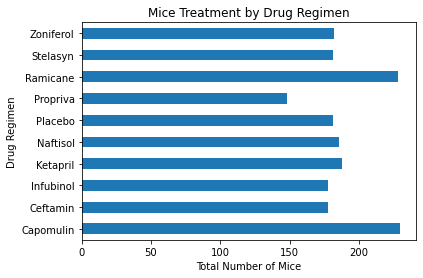

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
totalmice_treatment = mousestudy_cleandata_df.groupby('Drug Regimen')['Mouse ID'].count()
type (totalmice_treatment)

totalmice_treatment.plot(kind='barh', title="Mice Treatment by Drug Regimen")
plt.xlabel("Total Number of Mice")


Text(0, 0.5, 'Drug Regimen')

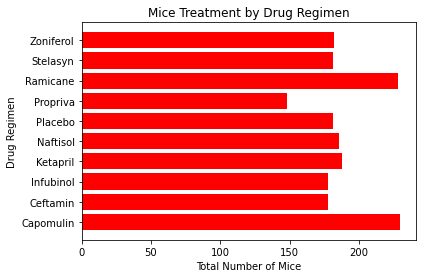

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.barh(totalmice_treatment.index,totalmice_treatment, color="red")
plt.title("Mice Treatment by Drug Regimen")
plt.xlabel("Total Number of Mice")
plt.ylabel("Drug Regimen")


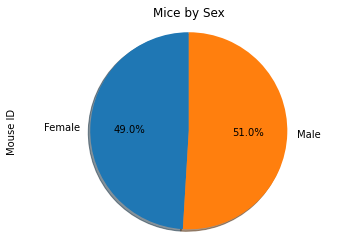

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
totalmice_malefemale = mousestudy_cleandata_df.groupby('Sex')['Mouse ID'].count()
type (totalmice_malefemale)

totalmice_malefemale.plot(kind='pie', title="Mice by Sex", autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()



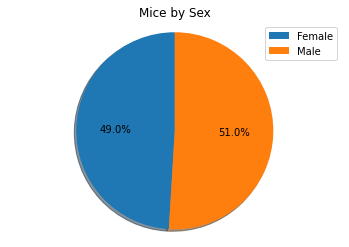

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(totalmice_malefemale,autopct="%1.1f%%", shadow=True, startangle=90) 
plt.title("Mice by Sex")
plt.axis("equal")
plt.legend(totalmice_malefemale.index, loc="best")
plt.show()






## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

lasttimepoint = mousestudy_cleandata_df.groupby("Mouse ID")["Timepoint"].max()
lasttimepoint = lasttimepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumorvol_lasttime = lasttimepoint.merge(mousestudy_cleandata_df, on=["Mouse ID","Timepoint"])
tumorvol_lasttime




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drugregimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drugregimenlist = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugnames in drugregimen:
    print(drugnames)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finaltumorvol = tumorvol_lasttime.loc[tumorvol_lasttime ["Drug Regimen"]==drugnames,"Tumor Volume (mm3)"]
    
    # add subset 
    drugregimenlist.append(finaltumorvol)
    
    # Determine outliers using upper and lower bounds
    quartiles = finaltumorvol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    #print(f"{drug}'s potential outliers: {outliers}")
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    
    print(f"Outliers are : {finaltumorvol.loc[(finaltumorvol < lower_bound)|(finaltumorvol > upper_bound)]}")
    
    outlier_occupancy = finaltumorvol.loc[(finaltumorvol < lower_bound) | (finaltumorvol > upper_bound)]
    outlier_occupancy
    #outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    #print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outliers are : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)


In [60]:
#For Loop of drug names
drugregimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drugnames in drugregimen:
    print(drugnames)

Capomulin
Ramicane
Infubinol
Ceftamin


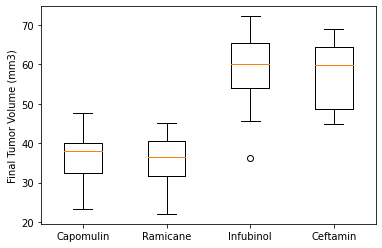

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Example outlier plot of reaction times
#orange_out = dict(markerfacecolor='red',marker"size=12)
plt.boxplot(drugregimenlist, labels = drugregimen)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()






## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin



In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
